In [1]:
%pwd

'e:\\CodeProject\\python\\OpenMMLab\\Mymmdetection\\demo'

In [2]:
%cd ..

e:\CodeProject\python\OpenMMLab\Mymmdetection


In [3]:
%pip install -v -e .

Using pip 23.0.1 from c:\Users\Code'Z\.conda\envs\openmmlab\lib\site-packages\pip (python 3.9)
Obtaining file:///E:/CodeProject/python/OpenMMLab/Mymmdetection
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: mmdet
    Found existing installation: mmdet 3.0.0
    Uninstalling mmdet-3.0.0:
      Removing file or directory c:\users\code'z\.conda\envs\openmmlab\lib\site-packages\mmdet.egg-link
      Removing pth entries from c:\users\code'z\.conda\envs\openmmlab\lib\site-packages\easy-install.pth:
      Removing entry: e:\codeproject\python\openmmlab\mymmdetection
      Successfully uninstalled mmdet-3.0.0
  Running setup.py develop for mmdet
Note: you may need to restart the kernel to use updated packages.


  Running command python setup.py egg_info
  running egg_info
  creating C:\Users\Code'Z\AppData\Local\Temp\pip-pip-egg-info-26fze9fk\mmdet.egg-info
  writing C:\Users\Code'Z\AppData\Local\Temp\pip-pip-egg-info-26fze9fk\mmdet.egg-info\PKG-INFO
  writing dependency_links to C:\Users\Code'Z\AppData\Local\Temp\pip-pip-egg-info-26fze9fk\mmdet.egg-info\dependency_links.txt
  writing requirements to C:\Users\Code'Z\AppData\Local\Temp\pip-pip-egg-info-26fze9fk\mmdet.egg-info\requires.txt
  writing top-level names to C:\Users\Code'Z\AppData\Local\Temp\pip-pip-egg-info-26fze9fk\mmdet.egg-info\top_level.txt
  writing manifest file 'C:\Users\Code'Z\AppData\Local\Temp\pip-pip-egg-info-26fze9fk\mmdet.egg-info\SOURCES.txt'
  reading manifest file 'C:\Users\Code'Z\AppData\Local\Temp\pip-pip-egg-info-26fze9fk\mmdet.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'LICENSE'
  writing manifest file 'C:\Users\Code'Z\AppData\Local\Temp\pip-pip-egg-info-26fze9fk\mmdet.e

In [4]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS
import mmcv

In [5]:
# download the checkpoint demo
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints
config_file = './checkpoints/rtmdet_tiny_8xb32-300e_coco.py'
checkpoint_file = './checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

processing rtmdet_tiny_8xb32-300e_coco...
downloading -------------------------------- 54.9/54.9 MiB 9.3 MB/s eta 0:00:00
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to e:\CodeProject\python\OpenMMLab\Mymmdetection\checkpoints
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to e:\CodeProject\python\OpenMMLab\Mymmdetection\checkpoints


In [6]:
# 将 mmdet 中的所有模块注册到注册表中
register_all_modules()
# 从配置文件和checkpoint文件(模型文件)构建模型
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cpu'

Loads checkpoint by local backend from path: ./checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



In [8]:
# test a single image
img = mmcv.imread( 'demo/demo.jpg', channel_order='rgb')
result = inference_detector(model, img)
print(result)
# 一个包含 DetDataSample 的列表，预测结果在 pred_instance 里，包含有检测框，类别和得分

<DetDataSample(

    META INFORMATION
    batch_input_shape: (640, 640)
    scale_factor: (1.0, 1.0)
    img_path: None
    ori_shape: (427, 640)
    pad_shape: (640, 640)
    img_id: 0
    img_shape: (640, 640)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([13,  2,  2,  2,  2,  2,  2,  2, 13,  2,  2,  2, 56,  2,  2,  7,  2,  2,
                         2,  2,  2,  2,  2,  2,  2,  2,  2,  7,  7,  2,  2,  2, 16,  2,  7,  2,
                         2,  7, 56,  2,  7,  2,  2,  7,  2,  2,  2,  2,  2,  2,  2,  7,  2,  7,
                         2,  2,  2,  2,  2,  2, 13,  2,  0,  7, 56,  2,  2,  7,  2,  2, 17,  7,
                         7,  2, 13,  2,  7,  2,  7,  2,  2,  7,  2,  2,  7, 13,  2,  7,  2, 13,
                         2, 13, 58,  2,  7,  2,  2,  7,  7,  2,  2,  2,  2,  2, 13,  2,  2,  2,
                         2, 13,  2,  2, 13,  7,  2,  5,  2,  2, 28,  7,  2,  2,  2,  

c:\Users\Code'Z\.conda\envs\openmmlab\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [9]:
# 初始化可视化工具（只执行一次这个块）
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# dataset_meta 从checkpoint文件加载，然后传递给 init_detector 中的模型
visualizer.dataset_meta = model.dataset_meta

05/14 23:18:05 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


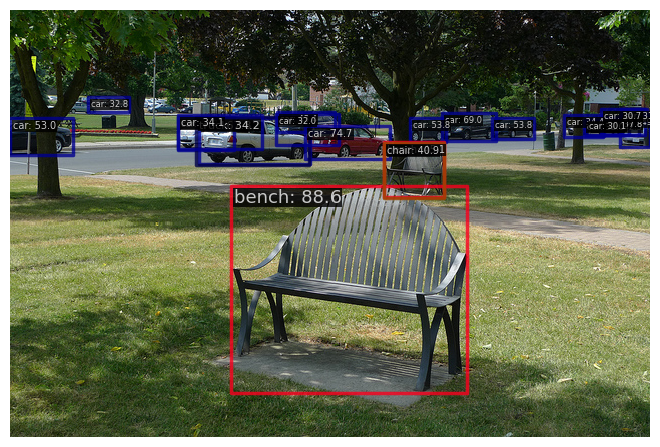

In [10]:
# show the results
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    wait_time=0,
)
visualizer.show()